In [ ]:
#https://www.kaggle.com/tokutani/lee-carter-model

In [1]:
import pandas as pd
import numpy as np

In [5]:
!cat ../grid_search_and_mean_function/mortality_mf.py

import itertools
from cwgp.grid_search import grid_search
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import GPy
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import normalize
import os




def zero(x):
	return 0

def one(x):
	return 1

def average(x):
	return avg

def sigmoid(x):
	return  1/(1+np.exp(-x))

def exponential(x):
	return np.exp(-x)



def gp_regression(x, y, mean_func):
	# kernel = GPy.kern.RBF(1)
	kernel = GPy.kern.Matern32(1)

	mf = GPy.core.Mapping(1,1)
	mf.f = lambda x: mean_func(x)
	mf.update_gradients = lambda a,b: None


	model = GPy.models.GPRegression(x[train_low:train_up], y[train_low:train_up], mean_function=mf, kernel=kernel)
	model.optimize()

	y_pred = model.predict(x[train_up:])[0]
	y_true = y[train_up:]

	rmse = mean_squared_error(y_true, y_pred, squared=False)
	mae = mean_absolute_error(y_true, y_pred)

	txt = f"""rmse : {rmse} \n mae : {mae}"""



In [26]:
CSV_FIlE = "../japan3.csv"
IMG_DIR = "./mf"

df = pd.read_csv(CSV_FIlE)
age = 90
df_all = {}
df_all[age]= df[(df["age"]==age)]

rate = df_all[age]["rate"].to_numpy().reshape(-1,1)
year = df_all[age]["year"].to_numpy().reshape(-1,1)



array([[0.3010279 ],
       [0.26294821],
       [0.28878282],
       [0.30267922],
       [0.29271007],
       [0.26286509],
       [0.30108992],
       [0.29209622],
       [0.28485077],
       [0.28046833],
       [0.31871728],
       [0.26592479],
       [0.26855547],
       [0.29261364],
       [0.27590848],
       [0.29515184],
       [0.27793594],
       [0.2752925 ],
       [0.28516129],
       [0.26492772],
       [0.2735761 ],
       [0.28095238],
       [0.26707531],
       [0.26690286],
       [0.2556247 ],
       [0.24618071],
       [0.262466  ],
       [0.26419121],
       [0.25080325],
       [0.24711908],
       [0.23875326],
       [0.23717385],
       [0.22099163],
       [0.24047453],
       [0.23090519],
       [0.21287955],
       [0.22210767],
       [0.21192475],
       [0.21016498],
       [0.20552061],
       [0.20082579],
       [0.21479959],
       [0.19471133],
       [0.20797302],
       [0.19665895],
       [0.19837425],
       [0.19527811],
       [0.190

In [31]:
x = age
T = max(year) - min(year)
logm_xt = np.log(rate).T
a_x = np.mean(logm_xt)

z_xt = logm_xt - a_x

U,S,V = np.linalg.svd(z_xt, full_matrices=True)

bxkt = S[0] * U[:,0]*V[0,:]
eps = z_xt - bxkt

bx = S[0] * U[:,0]

kt = V[0,:]


bx,kt

(array([-1.86884816]),
 array([-0.16602506, -0.09365649, -0.14380386, -0.16895232, -0.15103168,
        -0.09348732, -0.16613528, -0.14990835, -0.13646808, -0.12817173,
        -0.19657943, -0.09967968, -0.10494707, -0.15085536, -0.11940076,
        -0.15547684, -0.12331838, -0.1182048 , -0.13705106, -0.09766962,
        -0.11485817, -0.12909442, -0.10198974, -0.10164413, -0.07854197,
        -0.05839881, -0.09267432, -0.09617998, -0.06835303, -0.06043454,
        -0.04200626, -0.03845475, -0.00064076, -0.04585008, -0.02412173,
         0.01937067, -0.00333625,  0.02177601,  0.02623782,  0.03819519,
         0.05056029,  0.01456613,  0.06710508,  0.03184795,  0.06177941,
         0.05713248,  0.06554978,  0.07797913,  0.0597719 ,  0.10912227,
         0.08034103,  0.11823379,  0.09304548,  0.1396676 ,  0.14419507,
         0.15069891,  0.14669368,  0.15751252,  0.14932359,  0.15476662,
         0.16431635,  0.16152568,  0.1815024 ,  0.1535474 ,  0.16404959,
         0.15482698,  0.1765

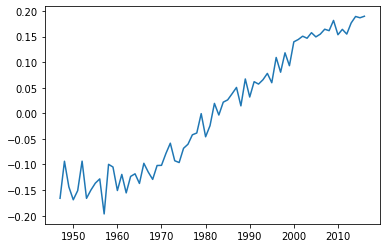

In [44]:
import seaborn as sns

sns.lineplot(np.ravel(year),kt)

In [ ]:
#第５９号　第２分冊（２００６年） 将来死亡率推定に関する一考察　＜及川桂＞ 
#Lee Carter Model
#logmx = ax + bx*kt + ε
#Σbx=1, Σkx=0

#Parameter設定
T=70
N=101
logm_xt=logmx_m+0 #ここでは男性の実績死亡率を使用

#ここから計算
a_x=logm_xt.sum(axis=1) / T #論文(1.4)式より
z_xt=logm_xt - a_x.reshape(N,1) #ブロードキャストにより計算　(101,70) - (101,1)の形式

U, S, V = np.linalg.svd(z_xt, full_matrices=True)

bxkt = S[0] * np.dot(U[:,0].reshape(N,1),V[0,:].reshape(T,1).T) #論文(1.5)式より
eps = z_xt - bxkt

#Lee Carter Modelでの予測値
logm_xt_lcfitted = bxkt + a_x.reshape(N,1)

#bx,kxの出力
b_x = U[:,0]/U[:,0].sum() #論文(1.7)式より
k_t = V[0,:]*S[0]*U[:,0].sum()
a_x = a_x + k_t.sum()*b_x
k_t = k_t - k_t.sum()

#ax+bx*ktが予測値を再現することの確認
chk = logm_xt_lcfitted - a_x.reshape(N,1)
chk = chk - np.dot(b_x.reshape(N,1),k_t.reshape(T,1).T)
chk = chk*chk
print(chk.sum())